t: 0.002 s, Suhu rata-rata: 22.93 Celcius 


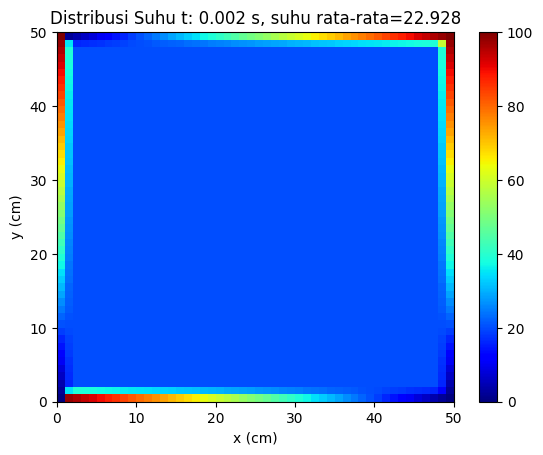

t: 0.005 s, Suhu rata-rata: 23.35 Celcius 
t: 0.007 s, Suhu rata-rata: 23.71 Celcius 
t: 0.009 s, Suhu rata-rata: 24.01 Celcius 
t: 0.011 s, Suhu rata-rata: 24.29 Celcius 
t: 0.014 s, Suhu rata-rata: 24.54 Celcius 
t: 0.016 s, Suhu rata-rata: 24.77 Celcius 
t: 0.018 s, Suhu rata-rata: 24.98 Celcius 
t: 0.020 s, Suhu rata-rata: 25.19 Celcius 
t: 0.023 s, Suhu rata-rata: 25.38 Celcius 
t: 0.025 s, Suhu rata-rata: 25.56 Celcius 
t: 0.027 s, Suhu rata-rata: 25.74 Celcius 
t: 0.030 s, Suhu rata-rata: 25.90 Celcius 
t: 0.032 s, Suhu rata-rata: 26.06 Celcius 
t: 0.034 s, Suhu rata-rata: 26.22 Celcius 
t: 0.036 s, Suhu rata-rata: 26.37 Celcius 
t: 0.039 s, Suhu rata-rata: 26.51 Celcius 
t: 0.041 s, Suhu rata-rata: 26.65 Celcius 
t: 0.043 s, Suhu rata-rata: 26.79 Celcius 
t: 0.045 s, Suhu rata-rata: 26.92 Celcius 
t: 0.048 s, Suhu rata-rata: 27.05 Celcius 
t: 0.050 s, Suhu rata-rata: 27.17 Celcius 
t: 0.052 s, Suhu rata-rata: 27.30 Celcius 
t: 0.055 s, Suhu rata-rata: 27.42 Celcius 
t: 0.057 s,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mendefinisikan Variabel
a = 110  # Koefisien Difusivitas Termal
panjang = 50  # Panjang plat [mm]
waktu = 1  # Waktu simulasi [s]
node = 50  # Jumlah titik grid

dx = panjang / node  # Jarak antar titik grid pada x [mm]
dy = panjang / node  # Jarak antar titik grid pada y [mm]
dt = min(dx ** 2 / (4 * a), dy ** 2 / (4 * a))  # Ukuran langkah waktu [s] (pilih yang lebih kecil agar stabil)
t_nodes = int(waktu / dt)  # Jumlah iterasi simulasi
u = np.zeros((node, node)) + 20  # Suhu awal plat [ degC ] (2 dimensi)

# Kondisi batas
u[0, :] = np.linspace(100, 0, node)  # Suhu tepi kiri (variasi linear)
u[-1, :] = np.linspace(0, 100, node)  # Suhu tepi kanan (variasi linear)
u[:, 0] = np.linspace(0, 100, node)  # Suhu tepi bawah (variasi linear)
u[:, -1] = np.linspace(0, 100, node)  # Suhu tepi atas (variasi linear)

# Visualisasi distribusi suhu awal
fig, ax = plt.subplots()
ax.set_ylabel("y (cm)")
ax.set_xlabel("x (cm)")
pcm = ax.pcolormesh(u, cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=ax)

# Simulasi
counter = 0
while counter < waktu:
    w = u.copy()  # Menyalin data suhu untuk perhitungan
    # Looping setiap titik grid kecuali batas
    for i in range(1, node - 1):
        for j in range(1, node - 1):
            # Menghitung perubahan suhu berdasarkan persamaan Laplace 2D
            # (menggunakan tetangga terdekat)
            dd_ux = (w[i - 1, j] - 2 * w[i, j] + w[i + 1, j]) / dx ** 2
            dd_uy = (w[i, j - 1] - 2 * w[i, j] + w[i, j + 1]) / dy ** 2
            u[i, j] = dt * a * (dd_ux + dd_uy) + w[i, j]  # Suhu baru dihitung dan ditambahkan ke suhu lama

    pcm.set_array(u)  # Memperbarui plot dan menampilkan waktu simulasi
    t_mean = np.mean(u)
    counter += dt  # Menambah waktu simulasi
    print(f"t: {counter:.3f} s, Suhu rata-rata: {t_mean:.2f} Celcius ")
    ax.set_title(f"Distribusi Suhu t: {counter:.3f} s, suhu rata-rata={t_mean:.3f}")
    plt.pause(0.01)

plt.show()